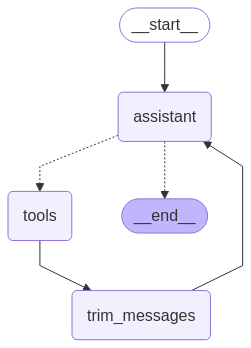

In [ ]:

from agents.fromScratchLLM_player_v2.creator_agent import CreatorAgent
from catanatron import Color

langPlayer = CreatorAgent()
langPlayer.print_react_graph()




In [ ]:
FOO_TARGET_FILENAME = "foo_player.py"

prompt = (
            f"""
            You are in charge of creating the code for a Catan Player in {FOO_TARGET_FILENAME}. 
            
            You Have the Following Tools at Your Disposal:
            - list_local_files: List all files in the current directory.
            - read_local_file: Read the content of a file in the current directory.
            - read_foo: Read the content of {FOO_TARGET_FILENAME}.
            - write_foo: Write the content of {FOO_TARGET_FILENAME}. (Make sure to keep imports) Note: print() commands will be visible in view_last_game_results
            - run_gamefoo: Test the content of {FOO_TARGET_FILENAME} in a game. Returns the output (last 10000 characters stdout and stderr of the game)
            - run_testfoo: Identical to run_gamefoo, but sets a 30 second timeout. Use this to test the efficiency of your llm prompts
            - web_search_tool_call: Perform a web search using the Tavily API.
            - view_last_game_llm_query: View the LLM query from the last game to see performance. 
            - view_last_game_results: View the game results from the last game. (Includes stdout and stderr from the game)
            
            YOUR GOAL: Create a Catan Player That Will play run_testfoo and Win Catan against the other players
            It must Incoorporate the LLM() class and the .query_llm() method

            """
        )

langPlayer = CreatorAgent()
initial_input = {"messages": SystemMessage(content=cur_prompt)}

react_graph = langPlayer.create_langchain_react_graph()
for event in react_graph.stream(initial_input, langPlayer.memory_config, stream_mode="values"):
    msg = event['messages'][-1]
    msg.pretty_print()
    final_msg = msg.content

In [ ]:
from agents.fromScratchLLM_player_v2.llm_tools import LLM

llm = LLM()
llm.query_llm("Hey")

'Hello! How can I assist you today? 😊'